# 1)Разведочный анализ данных. Исследование и визуализация данных.

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_wine
sns.set(style="ticks")

Исследование датасета по распознаванию вина

In [67]:
wine = load_wine()

Тип датасета

In [68]:
type(wine)

sklearn.utils._bunch.Bunch

Ключи датасета

In [69]:
for item in wine: print(item)

data
target
frame
target_names
DESCR
feature_names


Создаем датафрэйм

In [70]:
def make_dataframe(get_dataset):
    ds = get_dataset()
    return pd.DataFrame(data = np.c_[ds['data'], ds['target']], columns = list(ds['feature_names']) + ['target'])

In [71]:
df = make_dataframe(load_wine)

In [72]:
df['target'].unique()

array([0., 1., 2.])

In [73]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


 Загрузка данных

In [74]:
data = df

# 2) Основные характеристики датасета

In [75]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


 Размер датасета - 178 строк, 14 колонок


In [76]:
data.shape

(178, 14)

In [77]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 178


Список колонок


In [78]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

 Список колонок с типами данных


In [79]:
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

Проверим наличие пустых значений
Цикл по колонкам датасета


In [80]:
for col in data.columns:
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


Пустых значений нет

Основные статистические характеристки набора данных


In [81]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


# 3) Визуальное исследование датасета

<AxesSubplot: xlabel='color_intensity', ylabel='hue'>

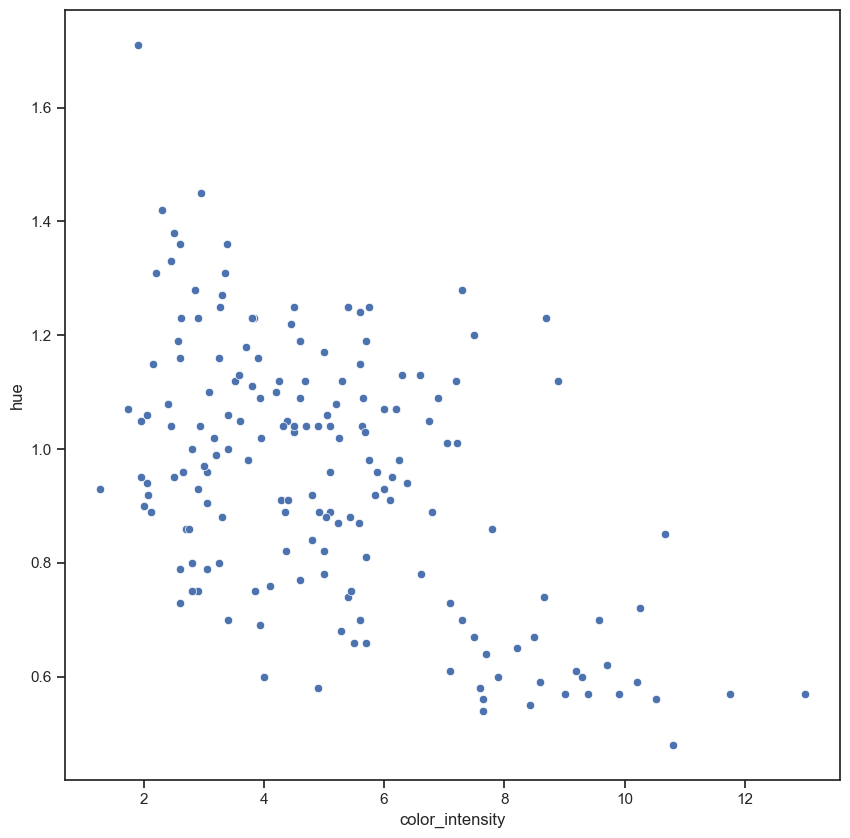

In [82]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='color_intensity', y='hue', data=data)

Чем темнее вино, тем у него интенсивнее цвет

Посмотрим насколько на эту зависимость влияет целевой признак.

<AxesSubplot: xlabel='color_intensity', ylabel='hue'>

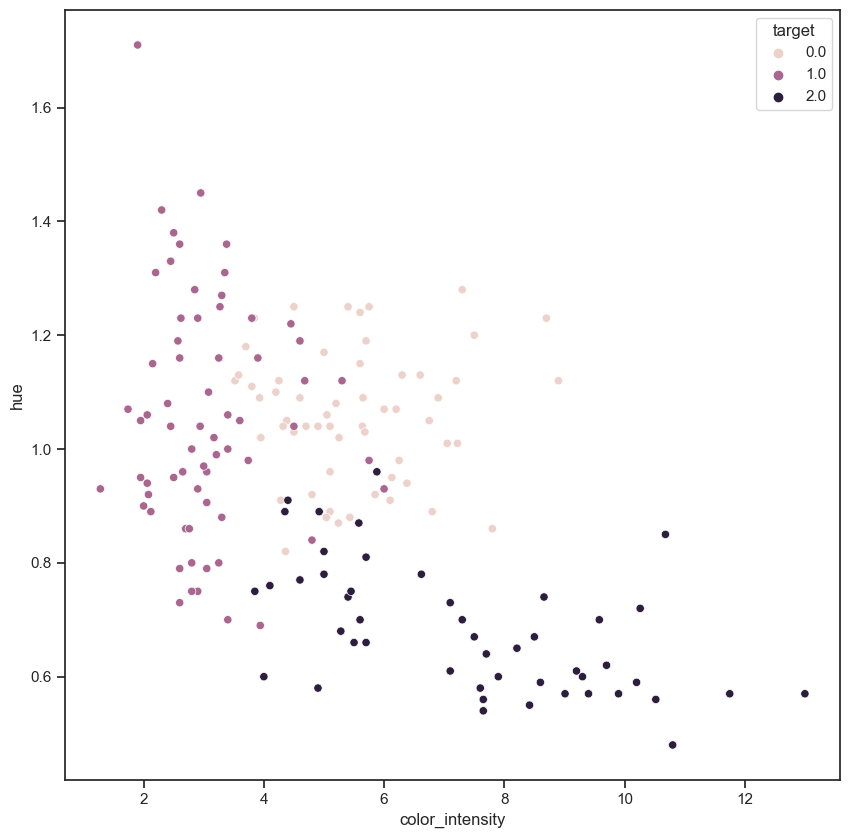

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='color_intensity', y='hue', data=data, hue='target')

У вин с первым классом низкая интенсивность, но темнее оттенок
У вин со вторым классом высокая интенсивность, но светлее оттенок
У вин с нулевым классом средняя интенсивность, средний оттенок

<AxesSubplot: xlabel='od280/od315_of_diluted_wines'>

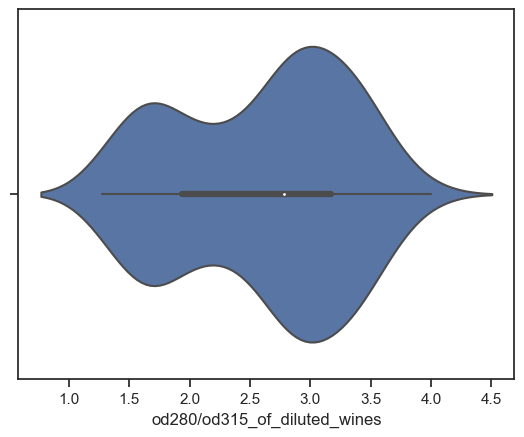

In [84]:
sns.violinplot(x=data['od280/od315_of_diluted_wines'])

Больше всего разбавленность с 3 процентами

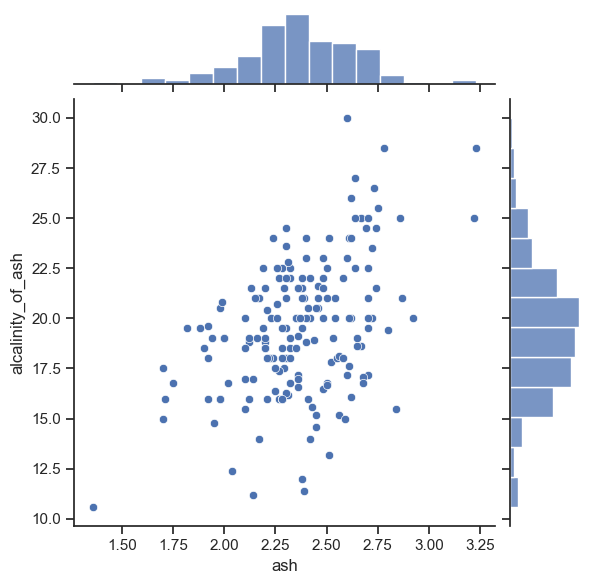

In [85]:
sns.jointplot(x='ash', y='alcalinity_of_ash', data=data)

<AxesSubplot: xlabel='target', ylabel='alcohol'>

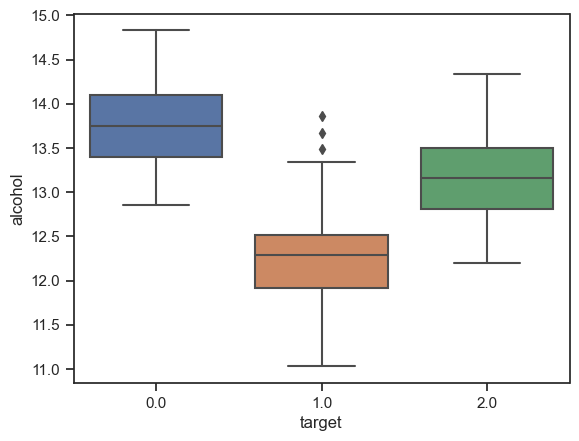

In [86]:
sns.boxplot(x='target', y='alcohol', data=data)

Процент алкоголя зависит от цвета вина

# 4) Информация о корреляции признаков

In [87]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [88]:
data.corr(method='pearson')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [89]:
data.corr(method='kendall')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.093844,0.170154,-0.212978,0.250506,0.209099,0.191087,-0.109554,0.133526,0.434353,-0.021717,0.061513,0.449387,-0.238984
malic_acid,0.093844,1.000000,0.158178,0.210119,0.050869,-0.174929,-0.211918,0.175129,-0.168714,0.195607,-0.388707,-0.162909,-0.044660,0.247494
ash,0.170154,0.158178,1.000000,0.258352,0.254246,0.089855,0.049474,0.098937,0.018240,0.187786,-0.037234,-0.006341,0.171574,-0.038085
alcalinity_of_ash,-0.212978,0.210119,0.258352,1.000000,-0.121005,-0.256669,-0.309865,0.278091,-0.171404,-0.057281,-0.239210,-0.226253,-0.313218,0.449402
magnesium,0.250506,0.050869,0.254246,-0.121005,1.000000,0.172195,0.161603,-0.158361,0.117871,0.241781,0.023760,0.034307,0.343016,-0.184992
total_phenols,0.209099,-0.174929,0.089855,-0.256669,0.172195,1.000000,0.701999,-0.310443,0.466517,0.028264,0.289210,0.478267,0.280203,-0.590404
flavanoids,0.191087,-0.211918,0.049474,-0.309865,0.161603,0.701999,1.000000,-0.378099,0.534615,0.028674,0.354372,0.520448,0.263661,-0.725255
nonflavanoid_phenols,-0.109554,0.175129,0.098937,0.278091,-0.158361,-0.310443,-0.378099,1.000000,-0.269189,0.036065,-0.179755,-0.363787,-0.174108,0.379234
proanthocyanins,0.133526,-0.168714,0.018240,-0.171404,0.117871,0.466517,0.534615,-0.269189,1.000000,-0.014962,0.231071,0.369104,0.204172,-0.450225
color_intensity,0.434353,0.195607,0.187786,-0.057281,0.241781,0.028264,0.028674,0.036065,-0.014962,1.000000,-0.291561,-0.206046,0.316632,0.065124


In [90]:
data.corr(method='spearman')

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.140430,0.243722,-0.306598,0.365503,0.310920,0.294740,-0.162207,0.192734,0.635425,-0.024203,0.103050,0.633580,-0.354167
malic_acid,0.140430,1.000000,0.230674,0.304069,0.080188,-0.280225,-0.325202,0.255236,-0.244825,0.290307,-0.560265,-0.255185,-0.057466,0.346913
ash,0.243722,0.230674,1.000000,0.366374,0.361488,0.132193,0.078796,0.145583,0.024384,0.283047,-0.050183,-0.007500,0.253163,-0.053988
alcalinity_of_ash,-0.306598,0.304069,0.366374,1.000000,-0.169558,-0.376657,-0.443770,0.389390,-0.253695,-0.073776,-0.352507,-0.325890,-0.456090,0.569792
magnesium,0.365503,0.080188,0.361488,-0.169558,1.000000,0.246417,0.233167,-0.236786,0.173647,0.357029,0.036095,0.056963,0.507575,-0.250498
total_phenols,0.310920,-0.280225,0.132193,-0.376657,0.246417,1.000000,0.879404,-0.448013,0.666689,0.011162,0.439457,0.687207,0.419470,-0.726544
flavanoids,0.294740,-0.325202,0.078796,-0.443770,0.233167,0.879404,1.000000,-0.543897,0.730322,-0.042910,0.535430,0.741533,0.429904,-0.854908
nonflavanoid_phenols,-0.162207,0.255236,0.145583,0.389390,-0.236786,-0.448013,-0.543897,1.000000,-0.384629,0.059639,-0.267813,-0.494950,-0.270112,0.474205
proanthocyanins,0.192734,-0.244825,0.024384,-0.253695,0.173647,0.666689,0.730322,-0.384629,1.000000,-0.030947,0.342795,0.554031,0.308249,-0.570648
color_intensity,0.635425,0.290307,0.283047,-0.073776,0.357029,0.011162,-0.042910,0.059639,-0.030947,1.000000,-0.418522,-0.317516,0.457096,0.131170


In [96]:
fig = px.imshow(data.corr(method='pearson'),text_auto=True,height=800,width=800,aspect='auto', title='Pearson')
fig.show()

In [97]:
fig = px.imshow(data.corr(method='kendall'),text_auto=True,height=800,width=800,aspect='auto', title='Kendall')
fig.show()

In [98]:
fig = px.imshow(data.corr(method='spearman'),text_auto=True,height=800,width=800,aspect='auto', title='Spearman')
fig.show()

Можно заметить, что чем больше алкоголя, тем больше пропина и интенсивности цвета.
Яблочная кислота, щелоч, нефлаваноидные фенолы приобладает во втором классе вина.
Химикаты, общие фенолы и флаваноиды в большом количестве присудствуют в разбавленных винах